# Gather

In [246]:
#import necessary libraries
import pandas as pd 
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#create the request
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response

<Response [200]>

In [3]:
#write the contents of the url to a tsv file
with open('image_predictions.tsv','wb') as file:
    file.write(response.content)

In [4]:
image_prediction=pd.read_csv('image_predictions.tsv',sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [162]:
#get the api keys
consumer_key='secret'
consumer_secret='secret'
bearer_token='secret'
access_token='secret'
access_secret='secret'

In [10]:
import tweepy
import json
from timeit import default_timer as timer

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
 
api=tweepy.API(auth,wait_on_rate_limit=True)





In [189]:
enhanced_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [12]:
tweet_ids=enhanced_archive.tweet_id.values
len(tweet_ids)

2356

In [31]:
count=0
fails_dict={}
start=timer()

with open('tweet_json.txt','w') as outfile:
    for tweet_id in tweet_ids:
        count+=1
        print(str(count) + ":" +str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success')
            json.dump(tweet._json,outfile)
            outfile.write('\n')
            
        except tweepy.errors.TweepyException  as e:
            print('Fail')
            fails_dict[tweet_id]=e
            pass
end=timer()        
print(end - start)
print(fails_dict)

1:892420643555336193
Success
2:892177421306343426
Success
3:891815181378084864
Success
4:891689557279858688
Success
5:891327558926688256
Success
6:891087950875897856
Success
7:890971913173991426
Success
8:890729181411237888
Success
9:890609185150312448
Success
10:890240255349198849
Success
11:890006608113172480
Success
12:889880896479866881
Success
13:889665388333682689
Success
14:889638837579907072
Success
15:889531135344209921
Success
16:889278841981685760
Success
17:888917238123831296
Success
18:888804989199671297
Success
19:888554962724278272
Success
20:888202515573088257
Fail
21:888078434458587136
Success
22:887705289381826560
Success
23:887517139158093824
Success
24:887473957103951883
Success
25:887343217045368832
Success
26:887101392804085760
Success
27:886983233522544640
Success
28:886736880519319552
Success
29:886680336477933568
Success
30:886366144734445568
Success
31:886267009285017600
Success
32:886258384151887873
Success
33:886054160059072513
Success
34:885984800019947520


Success
271:841314665196081154
Success
272:841077006473256960
Success
273:840761248237133825
Success
274:840728873075638272
Success
275:840698636975636481
Success
276:840696689258311684
Success
277:840632337062862849
Success
278:840370681858686976
Success
279:840268004936019968
Success
280:839990271299457024
Success
281:839549326359670784
Success
282:839290600511926273
Fail
283:839239871831150596
Success
284:838952994649550848
Success
285:838921590096166913
Success
286:838916489579200512
Success
287:838831947270979586
Success
288:838561493054533637
Success
289:838476387338051585
Success
290:838201503651401729
Success
291:838150277551247360
Success
292:838085839343206401
Success
293:838083903487373313
Success
294:837820167694528512
Success
295:837482249356513284
Success
296:837471256429613056
Success
297:837366284874571778
Fail
298:837110210464448512
Success
299:837012587749474308
Fail
300:836989968035819520
Success
301:836753516572119041
Success
302:836677758902222849
Success
303:83664

Success
536:807059379405148160
Success
537:807010152071229440
Success
538:806629075125202948
Success
539:806620845233815552
Success
540:806576416489959424
Success
541:806542213899489280
Success
542:806242860592926720
Success
543:806219024703037440
Success
544:805958939288408065
Success
545:805932879469572096
Success
546:805826884734976000
Success
547:805823200554876929
Success
548:805520635690676224
Success
549:805487436403003392
Success
550:805207613751304193
Success
551:804738756058218496
Success
552:804475857670639616
Success
553:804413760345620481
Success
554:804026241225523202
Success
555:803773340896923648
Success
556:803692223237865472
Success
557:803638050916102144
Success
558:803380650405482500
Success
559:803321560782307329
Success
560:803276597545603072
Success
561:802952499103731712
Success
562:802624713319034886
Success
563:802600418706604034
Success
564:802572683846291456
Success
565:802323869084381190
Success
566:802265048156610565
Success
567:802247111496568832
Fail
568

Success
801:772615324260794368
Success
802:772581559778025472
Success
803:772193107915964416
Success
804:772152991789019136
Success
805:772117678702071809
Success
806:772114945936949249
Success
807:772102971039580160
Success
808:771908950375665664
Success
809:771770456517009408
Success
810:771500966810099713
Success
811:771380798096281600
Success
812:771171053431250945
Success
813:771136648247640064
Success
814:771102124360998913
Success
815:771014301343748096
Success
816:771004394259247104
Fail
817:770787852854652928
Success
818:770772759874076672
Success
819:770743923962707968
Fail
820:770655142660169732
Success
821:770414278348247044
Success
822:770293558247038976
Success
823:770093767776997377
Success
824:770069151037685760
Success
825:769940425801170949
Success
826:769695466921623552
Success
827:769335591808995329
Success
828:769212283578875904
Success
829:768970937022709760
Success
830:768909767477751808
Success
831:768855141948723200
Success
832:768609597686943744
Success
833:76

Success
1064:741067306818797568
Success
1065:740995100998766593
Success
1066:740711788199743490
Success
1067:740699697422163968
Success
1068:740676976021798912
Success
1069:740373189193256964
Success
1070:740365076218183684
Success
1071:740359016048689152
Success
1072:740214038584557568
Success
1073:739979191639244800
Success
1074:739932936087216128
Success
1075:739844404073074688
Success
1076:739623569819336705
Success
1077:739606147276148736
Success
1078:739544079319588864
Success
1079:739485634323156992
Success
1080:739238157791694849
Success
1081:738891149612572673
Success
1082:738885046782832640
Success
1083:738883359779196928
Success
1084:738537504001953792
Success
1085:738402415918125056
Success
1086:738184450748633089
Success
1087:738166403467907072
Success
1088:738156290900254721
Success
1089:737826014890496000
Success
1090:737800304142471168
Success
1091:737678689543020544
Success
1092:737445876994609152
Success
1093:737322739594330112
Success
1094:737310737551491075
Success


Success
1321:706346369204748288
Success
1322:706310011488698368
Success
1323:706291001778950144
Success
1324:706265994973601792
Success
1325:706169069255446529
Success
1326:706166467411222528
Success
1327:706153300320784384
Success
1328:705975130514706432
Success
1329:705970349788291072
Success
1330:705898680587526145
Success
1331:705786532653883392
Success
1332:705591895322394625
Success
1333:705475953783398401
Success
1334:705442520700944385
Success
1335:705428427625635840
Success
1336:705239209544720384
Success
1337:705223444686888960
Success
1338:705102439679201280
Success
1339:705066031337840642
Success
1340:704871453724954624
Success
1341:704859558691414016
Success
1342:704847917308362754
Success
1343:704819833553219584
Success
1344:704761120771465216
Success
1345:704499785726889984
Success
1346:704491224099647488
Success
1347:704480331685040129
Success
1348:704364645503647744
Success
1349:704347321748819968
Success
1350:704134088924532736
Success
1351:704113298707505153
Success


Fail
1597:686286779679375361
Fail
1598:686050296934563840
Fail
1599:686035780142297088
Fail
1600:686034024800862208
Fail
1601:686007916130873345
Fail
1602:686003207160610816
Fail
1603:685973236358713344
Fail
1604:685943807276412928
Fail
1605:685906723014619143
Fail
1606:685681090388975616
Fail
1607:685667379192414208
Fail
1608:685663452032069632
Fail
1609:685641971164143616
Fail
1610:685547936038666240
Fail
1611:685532292383666176
Fail
1612:685325112850124800
Fail
1613:685321586178670592
Fail
1614:685315239903100929
Fail
1615:685307451701334016
Fail
1616:685268753634967552
Fail
1617:685198997565345792
Fail
1618:685169283572338688
Fail
1619:684969860808454144
Fail
1620:684959798585110529
Fail
1621:684940049151070208
Fail
1622:684926975086034944
Fail
1623:684914660081053696
Fail
1624:684902183876321280
Fail
1625:684880619965411328
Fail
1626:684830982659280897
Fail
1627:684800227459624960
Fail
1628:684594889858887680
Fail
1629:684588130326986752
Fail
1630:684567543613382656
Fail
1631:6845

Success
1864:675372240448454658
Success
1865:675362609739206656
Success
1866:675354435921575936
Success
1867:675349384339542016
Success
1868:675334060156301312
Success
1869:675166823650848770
Success
1870:675153376133427200
Success
1871:675149409102012420
Success
1872:675147105808306176
Success
1873:675146535592706048
Success
1874:675145476954566656
Success
1875:675135153782571009
Success
1876:675113801096802304
Success
1877:675111688094527488
Success
1878:675109292475830276
Success
1879:675047298674663426
Success
1880:675015141583413248
Success
1881:675006312288268288
Success
1882:675003128568291329
Success
1883:674999807681908736
Success
1884:674805413498527744
Success
1885:674800520222154752
Success
1886:674793399141146624
Success
1887:674790488185167872
Success
1888:674788554665512960
Success
1889:674781762103414784
Success
1890:674774481756377088
Success
1891:674767892831932416
Success
1892:674764817387900928
Success
1893:674754018082705410
Success
1894:674752233200820224
Success


Success
2121:670411370698022913
Success
2122:670408998013820928
Success
2123:670403879788544000
Success
2124:670385711116361728
Success
2125:670374371102445568
Success
2126:670361874861563904
Success
2127:670338931251150849
Success
2128:670319130621435904
Success
2129:670303360680108032
Success
2130:670290420111441920
Success
2131:670093938074779648
Success
2132:670086499208155136
Success
2133:670079681849372674
Success
2134:670073503555706880
Success
2135:670069087419133954
Success
2136:670061506722140161
Success
2137:670055038660800512
Success
2138:670046952931721218
Success
2139:670040295598354432
Success
2140:670037189829525505
Success
2141:670003130994700288
Success
2142:669993076832759809
Success
2143:669972011175813120
Success
2144:669970042633789440
Success
2145:669942763794931712
Success
2146:669926384437997569
Success
2147:669923323644657664
Success
2148:669753178989142016
Success
2149:669749430875258880
Success
2150:669684865554620416
Success
2151:669683899023405056
Success


In [13]:
#convert txt file to a dataframe
with open('tweet_json.txt') as file:
    lines=file.readlines()
convert=[]
for line in lines:
    convert.append(json.loads(line))
data_convert=pd.DataFrame(convert)


    
    

# Assess

In [407]:
#print the first five rows of the dataframe
pd.set_option('display.max.columns',None)
enhanced_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [408]:
enhanced_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [409]:
data_convert

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6860,32853,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,5169,28382,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,3410,21332,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,7073,35819,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,7578,34248,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,35,85,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2000,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,113,243,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2001,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081

In [410]:
data_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2004 non-null   object 
 1   id                             2004 non-null   int64  
 2   id_str                         2004 non-null   object 
 3   full_text                      2004 non-null   object 
 4   truncated                      2004 non-null   bool   
 5   display_text_range             2004 non-null   object 
 6   entities                       2004 non-null   object 
 7   extended_entities              1772 non-null   object 
 8   source                         2004 non-null   object 
 9   in_reply_to_status_id          62 non-null     float64
 10  in_reply_to_status_id_str      62 non-null     object 
 11  in_reply_to_user_id            62 non-null     float64
 12  in_reply_to_user_id_str        62 non-null     o

In [411]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [412]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [413]:
#find the total number of unique values 
enhanced_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [414]:
#create a function that calculates value_counts of columns
puppy=['doggo','puppo','pupper','floofer']
def value_counts(names,table_name):
  for i in names :
    var=table_name[i].value_counts()
    print(f"value counts for {i} are\n {var}\n")
    
value_counts(puppy,enhanced_archive)

value counts for doggo are
 None     2259
doggo      97
Name: doggo, dtype: int64

value counts for puppo are
 None     2326
puppo      30
Name: puppo, dtype: int64

value counts for pupper are
 None      2099
pupper     257
Name: pupper, dtype: int64

value counts for floofer are
 None       2346
floofer      10
Name: floofer, dtype: int64



In [416]:
#Get the value counts of possibly_sensitive_appealable and possibly_sensitive
value_counts(['possibly_sensitive_appealable','possibly_sensitive'],data_convert)

value counts for possibly_sensitive_appealable are
 False    1883
Name: possibly_sensitive_appealable, dtype: int64

value counts for possibly_sensitive are
 False    1883
Name: possibly_sensitive, dtype: int64



### Quality
#### `enhanced_archive` table
  1. Timestamp in object format.
  2. Retweets are not required, only original tweets.
 
  3. The following columns have missing values:in_reply_to_status_id,in_reply_to_userid,(retweeted_status_id - Retweeted_status_timestamp),doggo,puppo,pupper and floofer.
  
  4. Rating_denominator have other values like 150,70 etc. 
 
 

#### `data_convert` table
 5. Two columns for id's.
 6. Created at is in object format.
 7. The column id is not in uniformity with tweet_id in enhanced_archive and image_predictions tables
 8. The columns geo - contributors have almost no values.
 9. The columns retweeted_status - quoted_status , in_reply_to_status_id - in_reply_to_screen_name and     possibly_sensitive_appealable - possibly_sensitive have missing values.

 10. The column user has duplicated values that are in other columns for example id
 11. The columns entities and extended_entities have many variables in one column that is available in    other columns.
 12. The column display_text_range is in object form and has a value range from 0.
 


#### `image_predictions` table
 13. Has a non-descriptive column name img_num

### Tidiness
 1. Clubbing 4 dog stages into one column
 2. Merge all three datasets
  


In [417]:
#Make a copy of the dataframes above

enhanced_copy=enhanced_archive.copy()
dataconvert_copy=data_convert.copy()
image_copy=image_prediction.copy()

# Cleaning

#### 1. `Enhanced_archive` :Timestamp in object format.

### Define
  -  Convert the Timestamp into data format using to_datetime function

### Code

In [418]:
enhanced_copy['timestamp']=pd.to_datetime(enhanced_copy['timestamp'])

### Test 

In [419]:
enhanced_copy.timestamp.dtypes

datetime64[ns, UTC]


### 2. `Enhanced_archive`: Retweets are not required only original tweets.

### Define
- Remove records where retweeted_status-id is not null using the drop function

### Code

In [420]:
retweets=pd.notnull(enhanced_copy['retweeted_status_id'])
values=enhanced_copy[retweets].index
enhanced_copy.drop(values,inplace=True)

### Test

In [421]:
enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

#### 3. `Enhanced_archive`:- The following columns have missing values:in_reply_to_status_id,in_reply_to_userid,(retweeted_status_id - retweeted_status_timestamp),doggo,puppo,pupper and floofer. 

### Define
  - Drop in_reply_to_status_id,in_reply_to_userid and (retweeted_status_id - retweeted_status_timestamp) columns using the drop function.

### Code

In [422]:
enhanced_copy.drop(enhanced_copy.columns[[1,2,6,7,8]],axis=1,inplace=True)

### Test

In [423]:
enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### 4. `Enhanced_copy` : - rating_denominator have other values like 150,70 etc.  


### Define
- Change the denominator to 10


### Code

In [424]:
enhanced_copy.rating_denominator=enhanced_copy.rating_denominator[10]


### Test

In [425]:
enhanced_copy.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

### 5. `data_convert`: Two columns for id's

### Define
 - Drop the id_str column using the drop function.

### Code

In [426]:
dataconvert_copy.drop(['id_str'],axis=1,inplace=True)

### Test

In [427]:
dataconvert_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2004 non-null   object 
 1   id                             2004 non-null   int64  
 2   full_text                      2004 non-null   object 
 3   truncated                      2004 non-null   bool   
 4   display_text_range             2004 non-null   object 
 5   entities                       2004 non-null   object 
 6   extended_entities              1772 non-null   object 
 7   source                         2004 non-null   object 
 8   in_reply_to_status_id          62 non-null     float64
 9   in_reply_to_status_id_str      62 non-null     object 
 10  in_reply_to_user_id            62 non-null     float64
 11  in_reply_to_user_id_str        62 non-null     object 
 12  in_reply_to_screen_name        62 non-null     o

### 6. `data_convert`: Created_at is in object format

### define
 - Convert created_at object format into date format using to_datetime function

### code

In [428]:
dataconvert_copy.created_at=pd.to_datetime(dataconvert_copy.created_at)

### Test

In [429]:
dataconvert_copy.created_at.dtype

datetime64[ns, UTC]

### 7.`dataconvert_copy`: the column id is not in uniformity with tweet_id in enhanced_archive and image_predictions tables.


### define
  - Rename the column to tweet_id using the rename function 

### Code

In [430]:
dataconvert_copy.rename(columns={'id':'tweet_id'},inplace=True)

### Test

In [431]:
dataconvert_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2004 non-null   datetime64[ns, UTC]
 1   tweet_id                       2004 non-null   int64              
 2   full_text                      2004 non-null   object             
 3   truncated                      2004 non-null   bool               
 4   display_text_range             2004 non-null   object             
 5   entities                       2004 non-null   object             
 6   extended_entities              1772 non-null   object             
 7   source                         2004 non-null   object             
 8   in_reply_to_status_id          62 non-null     float64            
 9   in_reply_to_status_id_str      62 non-null     object             
 10  in_reply_to_user_id     

### 8. `data_convert`: the columns geo - contributors have almost no values.


### define
 - Drop the columnns geo - contributors using the drop function

### Code

In [432]:
dataconvert_copy.drop(['geo','coordinates','place','contributors'],axis=1,inplace=True)

### Test

In [433]:
dataconvert_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2004 non-null   datetime64[ns, UTC]
 1   tweet_id                       2004 non-null   int64              
 2   full_text                      2004 non-null   object             
 3   truncated                      2004 non-null   bool               
 4   display_text_range             2004 non-null   object             
 5   entities                       2004 non-null   object             
 6   extended_entities              1772 non-null   object             
 7   source                         2004 non-null   object             
 8   in_reply_to_status_id          62 non-null     float64            
 9   in_reply_to_status_id_str      62 non-null     object             
 10  in_reply_to_user_id     

### 9. `data_convert` :  - the columns retweeted_status - quoted_status , in_reply_to_status_id - in_reply_to_screen_name and possibly_sensitive_appealable - possibly_sensitive have missing values.


### Define
  - Drop those columns using the drop function. 

### Code

In [434]:
dataconvert_copy.drop(dataconvert_copy.iloc[:,8:12],axis=1,inplace=True)

In [435]:
dataconvert_copy.drop(dataconvert_copy.columns[[8,18,19,20,21,22]],axis=1,inplace=True)

In [436]:
dataconvert_copy.drop(['possibly_sensitive_appealable','possibly_sensitive'],axis=1,inplace=True)

### Test

In [437]:
dataconvert_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2004 non-null   datetime64[ns, UTC]
 1   tweet_id            2004 non-null   int64              
 2   full_text           2004 non-null   object             
 3   truncated           2004 non-null   bool               
 4   display_text_range  2004 non-null   object             
 5   entities            2004 non-null   object             
 6   extended_entities   1772 non-null   object             
 7   source              2004 non-null   object             
 8   user                2004 non-null   object             
 9   is_quote_status     2004 non-null   bool               
 10  retweet_count       2004 non-null   int64              
 11  favorite_count      2004 non-null   int64              
 12  favorited           2004 non-null 

### 10. `data_convert`: The column user has duplicated values that are in other columns for example id

### Define
 - Drop the user column using the drop function

### Code

In [438]:
dataconvert_copy.drop('user',axis=1,inplace=True)

### Test

In [439]:
dataconvert_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2004 non-null   datetime64[ns, UTC]
 1   tweet_id            2004 non-null   int64              
 2   full_text           2004 non-null   object             
 3   truncated           2004 non-null   bool               
 4   display_text_range  2004 non-null   object             
 5   entities            2004 non-null   object             
 6   extended_entities   1772 non-null   object             
 7   source              2004 non-null   object             
 8   is_quote_status     2004 non-null   bool               
 9   retweet_count       2004 non-null   int64              
 10  favorite_count      2004 non-null   int64              
 11  favorited           2004 non-null   bool               
 12  retweeted           2004 non-null 

### 11. `data_convert`:  The columns entities and extended_entities have many variables in one column that are available in other columns. 

### Define
 - drop the column entities and extended_entities using the drop function 

### Code

In [440]:
dataconvert_copy.drop(['extended_entities','entities'],axis=1,inplace=True)

### Test

In [441]:
dataconvert_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2004 non-null   datetime64[ns, UTC]
 1   tweet_id            2004 non-null   int64              
 2   full_text           2004 non-null   object             
 3   truncated           2004 non-null   bool               
 4   display_text_range  2004 non-null   object             
 5   source              2004 non-null   object             
 6   is_quote_status     2004 non-null   bool               
 7   retweet_count       2004 non-null   int64              
 8   favorite_count      2004 non-null   int64              
 9   favorited           2004 non-null   bool               
 10  retweeted           2004 non-null   bool               
 11  lang                2004 non-null   object             
dtypes: bool(4), datetime64[ns, UTC](1)

### 12. `data_convert`: the column display_text_range is in object form and has a value range from 0.

### Define
 - Using indexing, isolate the second value of every row, save it to an empty list and append it to the dataset. After that drop the original column `display_text_range`.

### Code

In [442]:
second_value=[]
for i in dataconvert_copy.display_text_range:
    second_value.append(i[1])
dataconvert_copy['Display_text_range']=second_value 

In [443]:
dataconvert_copy.drop(['display_text_range'],axis=1,inplace=True)

### Test

In [444]:
dataconvert_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2004 non-null   datetime64[ns, UTC]
 1   tweet_id            2004 non-null   int64              
 2   full_text           2004 non-null   object             
 3   truncated           2004 non-null   bool               
 4   source              2004 non-null   object             
 5   is_quote_status     2004 non-null   bool               
 6   retweet_count       2004 non-null   int64              
 7   favorite_count      2004 non-null   int64              
 8   favorited           2004 non-null   bool               
 9   retweeted           2004 non-null   bool               
 10  lang                2004 non-null   object             
 11  Display_text_range  2004 non-null   int64              
dtypes: bool(4), datetime64[ns, UTC](1)

### 13. `Image_predictions`: Has non-descriptive column names

### Define
  - Change the column names using the rename function

### Code

In [445]:
image_copy.rename(columns={'img_num':'image_number'},inplace=True)

### Test

In [446]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2075 non-null   int64  
 1   jpg_url       2075 non-null   object 
 2   image_number  2075 non-null   int64  
 3   p1            2075 non-null   object 
 4   p1_conf       2075 non-null   float64
 5   p1_dog        2075 non-null   bool   
 6   p2            2075 non-null   object 
 7   p2_conf       2075 non-null   float64
 8   p2_dog        2075 non-null   bool   
 9   p3            2075 non-null   object 
 10  p3_conf       2075 non-null   float64
 11  p3_dog        2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Tidiness

### 1. Clubbing four dog stages into one column

### Define
- Create a variable separate_d that has the four column dog names indexed out Replace the None values with nan using the replace function and club the four columns together using the apply function. Add the separate variable as a column to enhanced_copy and drop the four dog columns. 

### Code

In [447]:
separate_d=enhanced_copy.iloc[:,8:12]



In [448]:
separate_d = separate_d.replace(to_replace='None', value=np.nan)

separate_d["Combined_names"] = separate_d.apply(lambda x: ','.join(x.dropna()), axis=1)


In [449]:
separate_d['Last_part'] = separate_d['Combined_names'].str.split(',').str[0]

In [450]:
separate_d.drop('Combined_names',axis=1)

,doggo,floofer,pupper,puppo,Last_part
0,NaN,NaN,NaN,NaN,
1,NaN,NaN,NaN,NaN,
2,NaN,NaN,NaN,NaN,
3,NaN,NaN,NaN,NaN,
4,NaN,NaN,NaN,NaN,
...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,
2352,NaN,NaN,NaN,NaN,
2353,NaN,NaN,NaN,NaN,
2354,NaN,NaN,NaN,NaN,


In [451]:
enhanced_copy['Combined_names']=separate_d.Last_part

In [452]:
enhanced_copy.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

### Test

In [453]:
enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   Combined_names      2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 234.5+ KB


### 2. Merge the datasets into one

### Define
 - Merge the three datasets into one using the merge function.

### Code

In [454]:
merged_data=pd.merge(dataconvert_copy,enhanced_copy,on='tweet_id',how='inner')

In [455]:
merged_two=pd.merge(merged_data,image_copy,on='tweet_id',how='inner')

### Test

In [456]:
merged_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1703 entries, 0 to 1702
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          1703 non-null   datetime64[ns, UTC]
 1   tweet_id            1703 non-null   int64              
 2   full_text           1703 non-null   object             
 3   truncated           1703 non-null   bool               
 4   source_x            1703 non-null   object             
 5   is_quote_status     1703 non-null   bool               
 6   retweet_count       1703 non-null   int64              
 7   favorite_count      1703 non-null   int64              
 8   favorited           1703 non-null   bool               
 9   retweeted           1703 non-null   bool               
 10  lang                1703 non-null   object             
 11  Display_text_range  1703 non-null   int64              
 12  timestamp           1703 non-null 

In [457]:
#Save the file
merged_two.to_csv('twitter_archive_master.csv',index=False)


# Analyzing and Visualization

In [458]:

twitter_archive=pd.read_csv('twitter_archive_master.csv')


### Q1. What is the most popular dog stage or breed?

In [459]:
#Find the value counts for the dog stages
counts=twitter_archive.Combined_names.value_counts()
counts

pupper     143
doggo       73
puppo       22
floofer      6
Name: Combined_names, dtype: int64

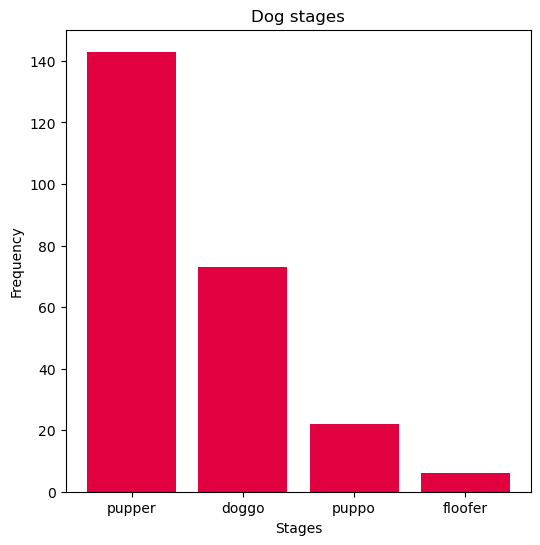

In [470]:
#visualize the value counts using a bar chart
fig,ax=plt.subplots(figsize=(6,6))
locations=[1,2,3,4]
labels=['pupper','doggo','puppo','floofer']
ax.bar(locations,counts.values,tick_label=labels,color='#E10040')
ax.set(title='Dog stages',xlabel='Stages',ylabel='Frequency')
plt.savefig('dog_breed.png')

### Q2. What is the most popular dog name?

In [461]:
#Get the value counts of dog names
twitter_archive.name.value_counts()

None          452
a              54
Oliver          9
Penny           9
Tucker          9
             ... 
Huck            1
O               1
Blue            1
Anakin          1
Christoper      1
Name: name, Length: 840, dtype: int64

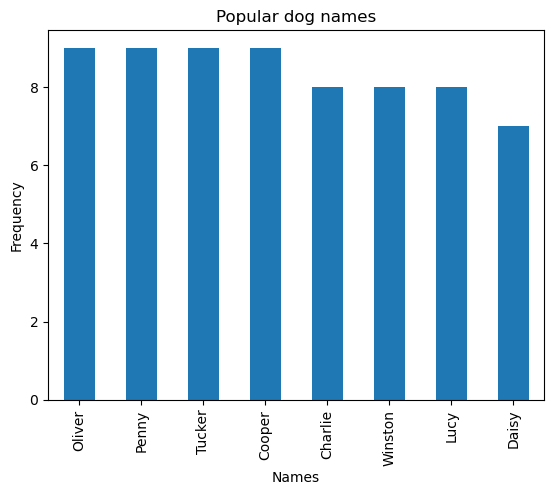

In [471]:
#Plot a bar graph for the value counts of dog names
twitter_archive.name.value_counts()[2:10].plot(kind='bar');
plt.title('Popular dog names')
plt.xlabel('Names')
plt.ylabel('Frequency')
plt.savefig('names.png');

### Q3. What is the most popular rating?

In [463]:
#Get the value_counts for the most popular ratings
ratings=twitter_archive.rating_numerator.value_counts()
ratings

12      399
10      346
11      328
13      247
9       114
8        81
7        41
14       34
6        27
5        26
3        15
4        13
2         9
1         5
0         2
80        1
88        1
144       1
26        1
60        1
45        1
1776      1
99        1
50        1
204       1
165       1
27        1
75        1
24        1
84        1
420       1
Name: rating_numerator, dtype: int64

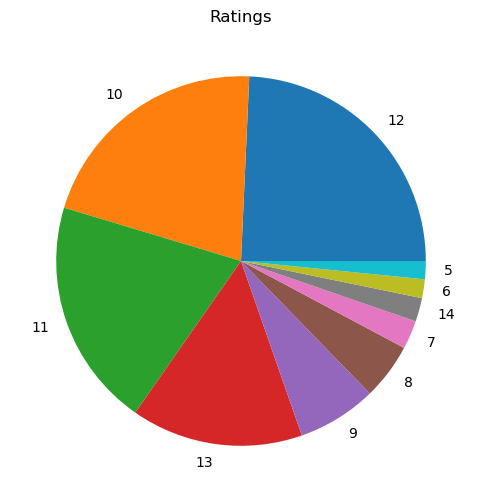

In [472]:
#Plot a pie chart for the rating
fig,ax=plt.subplots(figsize=(6,6))
ax.pie(ratings.values[:10],labels=ratings.index[:10])
ax.set_title('Ratings')
plt.savefig('ratings.png');

### Q4. What is the highest retweet and favorite count

In [465]:
twitter_archive[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,1703.000000,1703.000000
mean,2364.953611,8185.117440
std,4167.684401,11694.390703
min,11.000000,63.000000
25%,471.500000,1359.500000
50%,1201.000000,3996.000000
75%,2744.000000,10516.500000
max,69217.000000,141431.000000


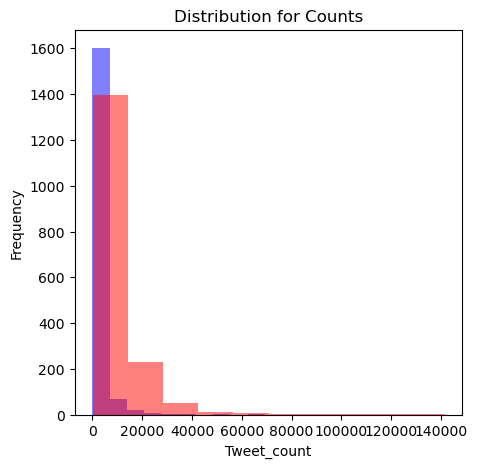

In [473]:
##Plot a histogram
fig,ax=plt.subplots(figsize=(5,5))
ax.hist(twitter_archive.retweet_count,color='blue',label='Yes',alpha=0.5)
ax.hist(twitter_archive.favorite_count,color='red',label='No',alpha=0.5)
ax.set(title='Distribution for Counts',xlabel='Tweet_count',ylabel='Frequency')
ax.legend
plt.savefig('Tweet_count.png');

### Q5. What is the dog breed and rating of the highest retweet count?

In [467]:
twitter_archive[twitter_archive.retweet_count == 69217]

,created_at,tweet_id,full_text,truncated,source_x,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,Display_text_range,timestamp,source_y,text,expanded_urls,rating_numerator,rating_denominator,name,Combined_names,jpg_url,image_number,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
768,2016-06-18 18:26:18+00:00,744234799360020481,Here's a doggo realizing you can stand in a po...,False,"<a href=""http://twitter.com/download/iphone"" r...",False,69217,141431,False,False,en,91,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


## Insights

 ### Q1 -The most popular dog breed is Pupper and least floofer. 
 ### Q2 - The most popular dog names are Oliver, Penny, Tucker and Cooper which are equaly popular.
 ### Q3 -  The most popular rating is 12.
 ### Q4- The highest retweet count and favorite count are 69217 and 141431 
 ### Q5 - The breed and rating of the highest retweet count are doggo and 13.